In [1]:
# 모듈 importing
from pykrx import stock
from pykrx import bond
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import mplfinance as mpf
from matplotlib import font_manager, rc
from datetime import datetime
from datetime import date

font_name = font_manager.FontProperties(fname='C:\\Windows\\Fonts\\malgun.ttf').get_name()
rc('font', family=font_name) 

plt.rcParams['figure.figsize'] = (10, 6) # 그래프 크기 설정

# stock module

In [2]:
# ticker-인덱스명
tmp = []
for ticker in stock.get_index_ticker_list():
    tmp.append([ticker, stock.get_index_ticker_name(ticker)])

# 데이터 프레임 생성
scale_2022 = pd.DataFrame(tmp).iloc[:4,:]

# 열 명 변경
scale_2022.columns = ['ticker','name2022']

scale_2022

,ticker,name2022
0,1001,코스피
1,1002,코스피 대형주
2,1003,코스피 중형주
3,1004,코스피 소형주


# 데이터 전처리 및 데이터프레임 설정

In [3]:
# DataFrame 구축

# DF 생성
df_scale_day = pd.DataFrame([])          # 일단위 데이터
df_scale_month = pd.DataFrame([])        # 월단위 데이터
df_scale_year = pd.DataFrame([])         # 년단위 데이터

# DF 내용 쓰기
for j in range(scale_2022.iloc[:,0].count()):
    # ticker 값을 i에 저장
    i = scale_2022.iloc[j,0]
    
    # temp DF에 2000.01.01~2022.09.01 규모별 ohlcv와 fundamental 쓰기(merge 이용하여 옆으로 붙임.)
    temp_day = pd.merge(stock.get_index_ohlcv("20030301", "20220901", str(i)).reset_index(), 
                     stock.get_index_fundamental("20030301", "20220901", str(i)).reset_index(), 
                     how='outer')
    temp_month = stock.get_index_ohlcv("20030301", "20220901", str(i),'m').reset_index()
                
    temp_year = stock.get_index_ohlcv("20030301", "20211231", str(i),'y').reset_index()
    
    # 해당 섹터 ticker, 섹터 명칭 쓰기
    temp_day['scale_name'] = stock.get_index_ticker_name(i)
    temp_day['scale_ticker'] = i
    
    temp_month['scale_name'] = stock.get_index_ticker_name(i)
    temp_month['scale_ticker'] = i
    
    temp_year['scale_name'] = stock.get_index_ticker_name(i)
    temp_year['scale_ticker'] = i
    
    # 임시 DF를 결과물 DF에 합치기
    df_scale_day = pd.concat([df_scale_day,temp_day])
    df_scale_month = pd.concat([df_scale_month,temp_month])
    df_scale_year = pd.concat([df_scale_year,temp_year])

# 칼럼명 영어로 변환
df_scale_day.columns = ['date','open','high','low','close','volume','volume($)',
                     'Market_Cap','Range','PER','FWDPER','PBR','dividend_Yield','scale_name','scale_ticker']
df_scale_month.columns = ['date','open','high','low','close','volume','volume($)','scale_name','scale_ticker']
df_scale_year.columns = ['date','open','high','low','close','volume','volume($)','scale_name','scale_ticker']

# # 칼럼 순서 변경
df_scale_day = df_scale_day[['scale_ticker','scale_name','date','open','high','low','close','volume','volume($)',
                     'Market_Cap','Range','PER','FWDPER','PBR','dividend_Yield']]
df_scale_month = df_scale_month[['scale_ticker','scale_name','date','open','high','low','close','volume','volume($)']]
df_scale_year = df_scale_year[['scale_ticker','scale_name','date','open','high','low','close','volume','volume($)']]

In [4]:
for j in range(scale_2022.iloc[:,0].count()):
    temp_month = stock.get_index_ohlcv("20030301", "20220901", str(i),'m').reset_index() 
temp_month

코스피 소형주,날짜,시가,고가,저가,종가,거래량,상장시가총액
0,2003-03-31,347.08,349.83,298.29,317.25,2465291418,5117089422150
1,2003-04-30,314.35,372.62,314.34,354.06,2242186235,5722120315500
2,2003-05-31,355.47,379.58,352.19,379.02,1532372414,6137126980595
3,2003-06-30,381.22,397.66,380.49,391.31,2293053125,6448185394775
4,2003-07-31,391.89,409.75,385.78,395.68,3563180228,6590603137925
...,...,...,...,...,...,...,...
230,2022-05-31,2698.19,2736.42,2525.01,2595.77,11666980192,106117227156497
231,2022-06-30,2594.66,2604.95,2075.65,2214.18,8228826641,90325888660011
232,2022-07-31,2215.77,2314.17,2125.32,2314.17,4852939600,94303150531429
233,2022-08-31,2319.04,2413.93,2305.14,2358.82,6269389853,97075431198633


In [5]:
# 일자별 데이터를 규모별로 분리

df_scale_day_kospi = df_scale_day[df_scale_day['scale_name']=='코스피']
df_scale_day_small = df_scale_day[df_scale_day['scale_name']=='코스피 소형주']
df_scale_day_medium = df_scale_day[df_scale_day['scale_name']=='코스피 중형주']
df_scale_day_large = df_scale_day[df_scale_day['scale_name']=='코스피 대형주']

In [6]:
# 월별 데이터를 규모별로 분리

df_scale_month_kospi = df_scale_month[df_scale_month['scale_name']=='코스피']
df_scale_month_small = df_scale_month[df_scale_month['scale_name']=='코스피 소형주']
df_scale_month_medium = df_scale_month[df_scale_month['scale_name']=='코스피 중형주']
df_scale_month_large = df_scale_month[df_scale_month['scale_name']=='코스피 대형주']

In [7]:
# 년별 데이터를 규모별로 분리

df_scale_year_kospi = df_scale_year[df_scale_year['scale_name']=='코스피']
df_scale_year_small = df_scale_year[df_scale_year['scale_name']=='코스피 소형주']
df_scale_year_medium = df_scale_year[df_scale_year['scale_name']=='코스피 중형주']
df_scale_year_large = df_scale_year[df_scale_year['scale_name']=='코스피 대형주']

#  시각화 및 데이터프레임 조정

# 이동평균선 ( 월별, 일별, 지수화된 MA선 )

In [8]:
# rolling window 값이 이동평균선 날짜 => 원하는 대로 수정하여 사용 가능
# MA_sep 은 단순 이동평균 가격을 종가로 나눠서 1의 비율로 맞추는 과정 => 1보다 크면 상승, 1보다 작으면 하락

def df_manipulate_kospi(x):
    x = x.set_index('date')
    x = x[['open', 'high', 'low', 'close', 'volume']]
    
    x["MA60"] = x['close'].rolling(window=60).mean()
    x["MA120"] = x['close'].rolling(window=120).mean()
    x["MA360"] = x['close'].rolling(window=360).mean()

    x["MA60_sep"] = (x["MA60"] / x['close'])
    x["MA120_sep"] = (x["MA120"] / x['close'])
    x["MA360_sep"] = (x["MA360"] / x['close'])
    return x

In [9]:
df_scale_day_kospi = df_manipulate_kospi(df_scale_day_kospi)
df_scale_day_small = df_manipulate_kospi(df_scale_day_small)
df_scale_day_medium = df_manipulate_kospi(df_scale_day_medium)
df_scale_day_large = df_manipulate_kospi(df_scale_day_large)
df_scale_month_kospi = df_manipulate_kospi(df_scale_month_kospi)
df_scale_month_small = df_manipulate_kospi(df_scale_month_small)
df_scale_month_medium = df_manipulate_kospi(df_scale_month_medium)
df_scale_month_large = df_manipulate_kospi(df_scale_month_large)


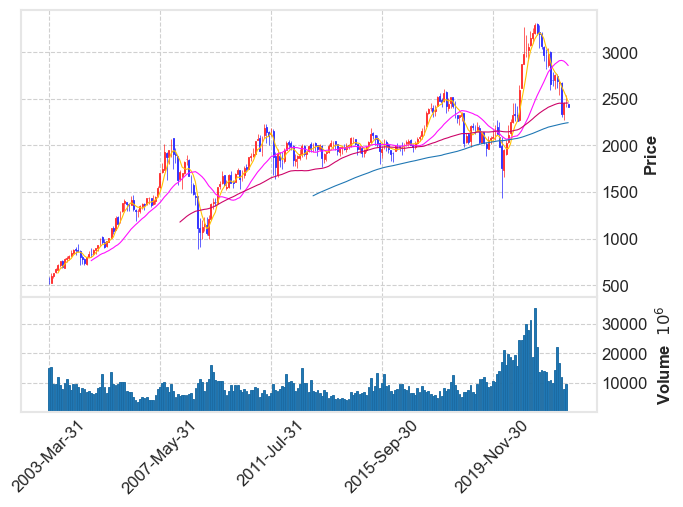

In [10]:
import mplfinance as mpf

mc = mpf.make_marketcolors(
    up="r", 
    down="b", 
    edge="inherit",   # 캔들의 몸통색
    wick="inherit"    # 캔들의 머리/꼬리색
)

s = mpf.make_mpf_style(
    base_mpf_style="binance", 
    marketcolors=mc, 
#     gridaxis='both',   # horizontal, vertical, both
    y_on_right=True    # False는 y축을 왼쪽에 표시
)

mpf.plot(
    data=df_scale_month_kospi,
    type='candle',
    style=s,
    mav=(5, 20, 60, 120),
    volume=True,
#     xlim=('2020-01-01', '2022-09-30'),
#     ylim=(1500, 3300),
#     figratio=(30, 10),
)

# 코스피 일별 60일 이동평균선 및 소형주 / 중형주 종가 시각화

C:\Users\Admin\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 53076 (\N{HANGUL SYLLABLE KO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 54588 (\N{HANGUL SYLLABLE PI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\anaconda3\l

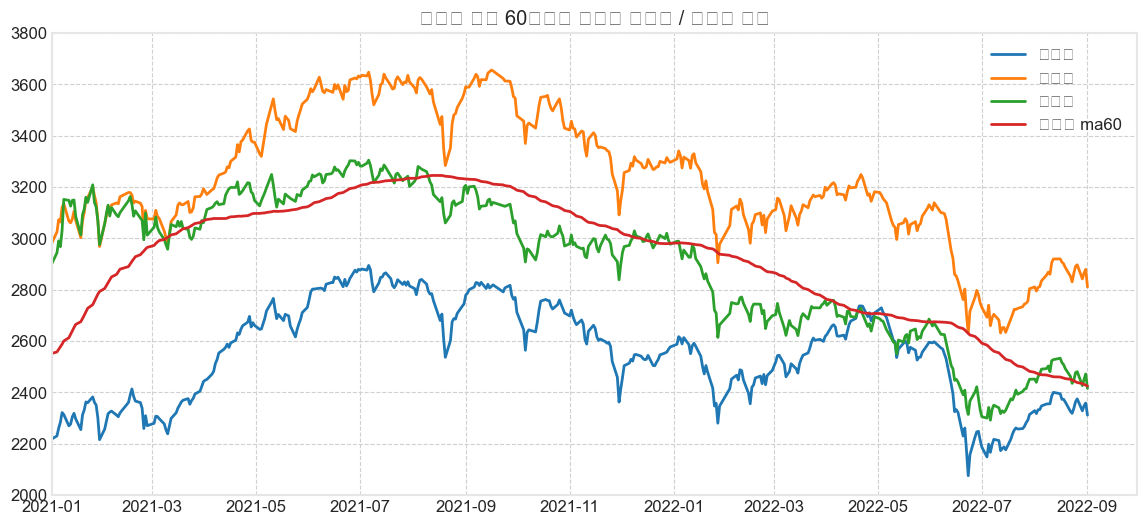

In [11]:
# 코스피, 대형주, 중형주, 소형주가 가격이 각각 다르기 때문에 직관적으로 비교하기가 힘들어보임

fig = plt.figure(figsize=(14, 6))
ax = fig.add_subplot(1, 1, 1)

ax.plot(df_scale_day_small['close'], label="소형주")
ax.plot(df_scale_day_medium['close'], label="중형주")
ax.plot(df_scale_day_kospi["close"], label='코스피')
ax.plot(df_scale_day_kospi["MA60"], label='코스피 ma60')

my_date_start = date(2021, 1, 1)
my_date_end = date(2022, 9, 30)

plt.xlim([my_date_start, my_date_end])
plt.ylim([2000, 3800])
ax.legend(loc='best')
plt.title('코스피 일별 60일선과 코스피 소형주 / 중형주 비교')
plt.show()

# 코스피 일별 누적 수익률 계산

In [12]:
# 누적 수익률 계산 함수

def get_kospi_stack_yield(x):
    print(f'### YYYY-MM-DD 형식으로 입력해주세요. ###')
    print(f'ex : 2020-01-02, 2021-08-31')
    start_day = input("매수날짜 : ")
    end_day = input("매도날짜 : ")
    kospi_tmp = x.loc[start_day : end_day, 'close']
    kospi_tmp = kospi_tmp.sort_index()
    
    kospi_tmp_yield = kospi_tmp.iloc[-1] / kospi_tmp.iloc[0]
    print(f'기간 누적 수익률 : {round((kospi_tmp_yield - 1) * 100, 2)}%')

In [13]:
get_kospi_stack_yield(df_scale_day_kospi)

### YYYY-MM-DD 형식으로 입력해주세요. ###
ex : 2020-01-02, 2021-08-31
매수날짜 : 2020-01-02
매도날짜 : 2021-08-31
기간 누적 수익률 : 47.08%


In [14]:
# 연복리수익률 계산 함수
def get_kospi_cagr(x):
    print(f'### YYYY-MM-DD 형식으로 입력해주세요. ###')
    start_day = input("매수날짜 : ")
    end_day = input("매도날짜 : ")
    kospi_tmp = x.loc[start_day : end_day, 'close']
    kospi_tmp = kospi_tmp.sort_index()
    
    kospi_diff = (kospi_tmp.index[-1] - kospi_tmp.index[0])
    투자기간 = kospi_diff.days / 365
    kospi_tmp_yield = kospi_tmp.iloc[-1] / kospi_tmp.iloc[0]
    cagr = kospi_tmp_yield ** (1 / 투자기간) - 1
    
    print(f'연평균 수익률 : {round(cagr * 100, 2)}%')

In [15]:
get_kospi_cagr(df_scale_day_kospi)

### YYYY-MM-DD 형식으로 입력해주세요. ###
매수날짜 : 2020-01-02
매도날짜 : 2021-08-31
연평균 수익률 : 26.11%


In [16]:
# 로그수익률 계산 함수

def get_kospi_log_yield(x):
    print(f'### YYYY-MM-DD 형식으로 입력해주세요. ###')
    start_day = input("매수날짜 : ")
    end_day = input("매도날짜 : ")
    kospi_tmp = x.loc[start_day : end_day, 'close']
    
    kospi_log = np.log(kospi_tmp[-1] / kospi_tmp[0])
    print(f'로그 수익률 : {round(kospi_log * 100, 2)}%')

In [17]:
get_kospi_log_yield(df_scale_day_kospi)

### YYYY-MM-DD 형식으로 입력해주세요. ###
매수날짜 : 2020-01-02
매도날짜 : 2021-08-31
로그 수익률 : 38.58%


# 이동평균가격을 그 해당하는 종가로 나누면 같은 비율로 구해볼 수 있음 > 상균이형 피드백

C:\Users\Admin\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 52509 (\N{HANGUL SYLLABLE CONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


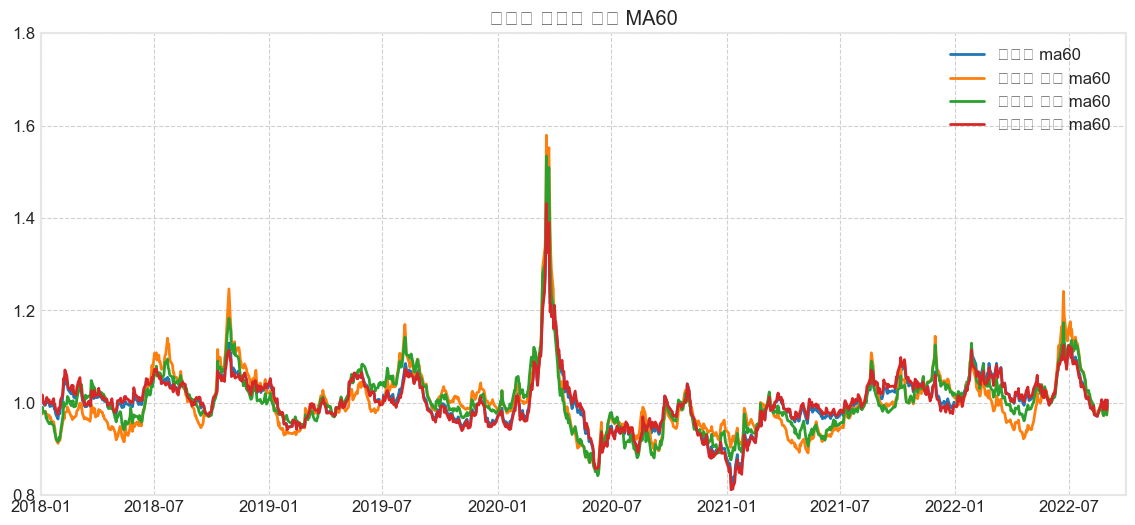

In [18]:
# MA_sep 사용했기 때문에 1 값에서 진동함

fig = plt.figure(figsize=(14, 6))
ax = fig.add_subplot(1, 1, 1)

ax.plot(df_scale_day_kospi["MA60_sep"], label='코스피 ma60')
ax.plot(df_scale_day_small["MA60_sep"], label='코스피 소형 ma60')
ax.plot(df_scale_day_medium["MA60_sep"], label='코스피 중형 ma60')
ax.plot(df_scale_day_large["MA60_sep"], label='코스피 대형 ma60')

ax.legend(loc='best')
plt.title('코스피 시총별 일별 MA60')
# 구간별로 쪼개서 보여줘야 할듯..
my_date_start = date(2018, 1, 1)
my_date_end = date(2022, 9, 30)
plt.xlim([my_date_start, my_date_end])
plt.ylim(0.8, 1.8)
plt.show()

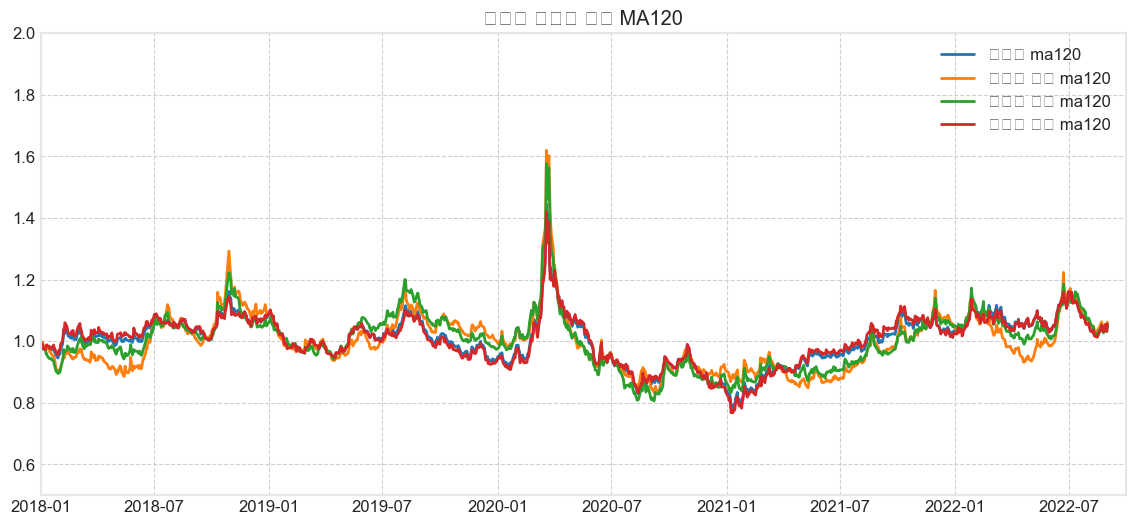

In [19]:
# MA_sep 사용했기 때문에 1 값에서 진동함

fig = plt.figure(figsize=(14, 6))
ax = fig.add_subplot(1, 1, 1)

ax.plot(df_scale_day_kospi["MA120_sep"], label='코스피 ma120')
ax.plot(df_scale_day_small["MA120_sep"], label='코스피 소형 ma120')
ax.plot(df_scale_day_medium["MA120_sep"], label='코스피 중형 ma120')
ax.plot(df_scale_day_large["MA120_sep"], label='코스피 대형 ma120')

ax.legend(loc='best')
plt.title('코스피 시총별 일별 MA120')
# 구간별로 쪼개서 보여줘야 할듯..
my_date_start = date(2018, 1, 1)
my_date_end = date(2022, 9, 30)
plt.xlim([my_date_start, my_date_end])
plt.ylim(0.5, 2)
plt.show()

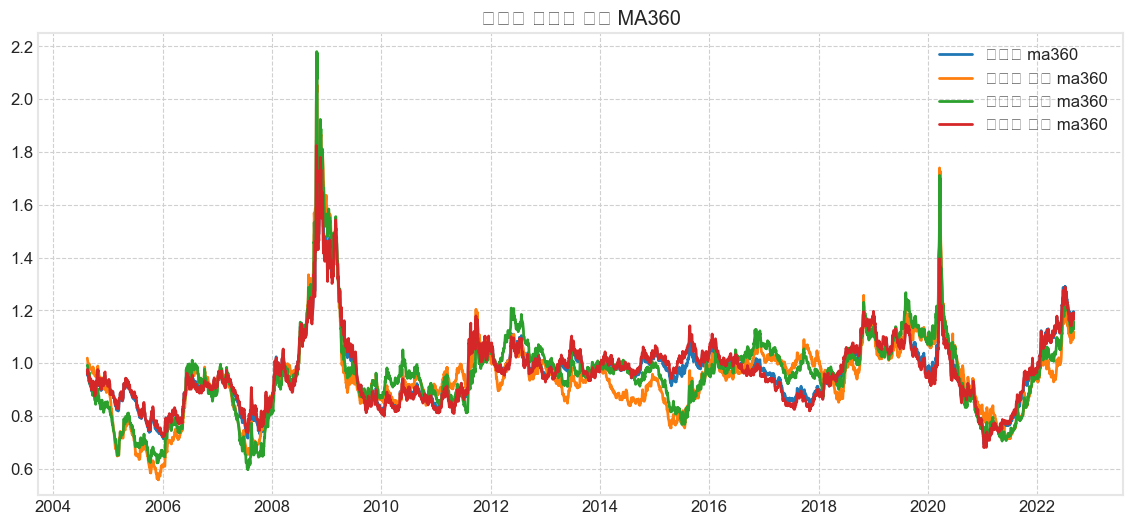

In [20]:
# MA_sep 사용했기 때문에 1 값에서 진동함

fig = plt.figure(figsize=(14, 6))
ax = fig.add_subplot(1, 1, 1)

ax.plot(df_scale_day_kospi["MA360_sep"], label='코스피 ma360')
ax.plot(df_scale_day_small["MA360_sep"], label='코스피 소형 ma360')
ax.plot(df_scale_day_medium["MA360_sep"], label='코스피 중형 ma360')
ax.plot(df_scale_day_large["MA360_sep"], label='코스피 대형 ma360')

ax.legend(loc='best')
plt.title('코스피 시총별 일별 MA360')
# 구간별로 쪼개서 보여줘야 할듯..
# my_date_start = date(2018, 1, 1)
# my_date_end = date(2022, 9, 30)
# plt.xlim([my_date_start, my_date_end])
plt.ylim(0.5, 2.25)
plt.show()

C:\Users\Admin\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


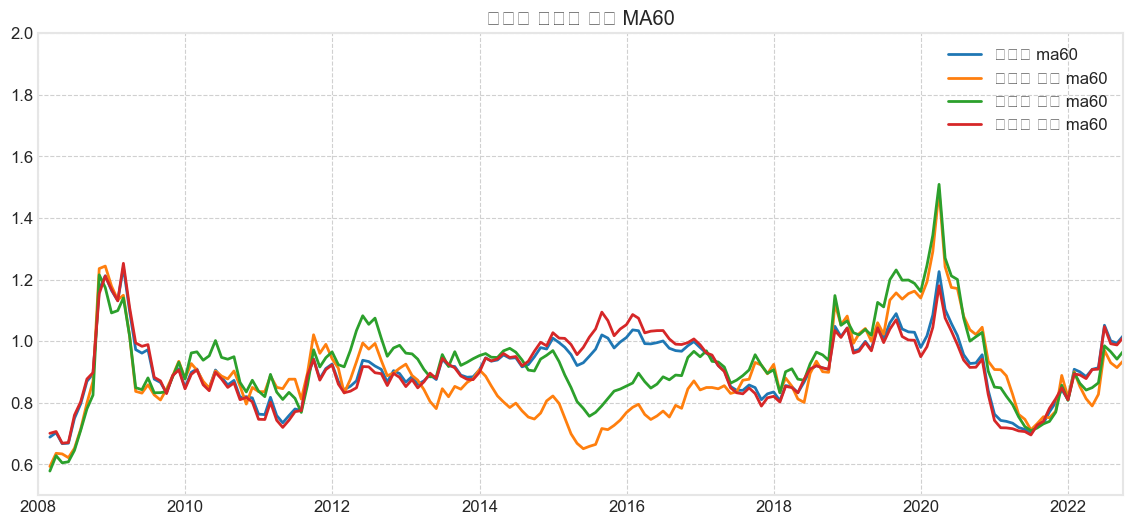

In [21]:
# MA_sep 사용했기 때문에 1 값에서 진동함

fig = plt.figure(figsize=(14, 6))
ax = fig.add_subplot(1, 1, 1)

ax.plot(df_scale_month_kospi["MA60_sep"], label='코스피 ma60')
ax.plot(df_scale_month_small["MA60_sep"], label='코스피 소형 ma60')
ax.plot(df_scale_month_medium["MA60_sep"], label='코스피 중형 ma60')
ax.plot(df_scale_month_large["MA60_sep"], label='코스피 대형 ma60')



ax.legend(loc='best')
plt.title('코스피 시총별 월별 MA60')
my_date_start = date(2008, 1, 1)
my_date_end = date(2022, 9, 30)
plt.xlim([my_date_start, my_date_end])
plt.ylim(0.5, 2)
plt.show()

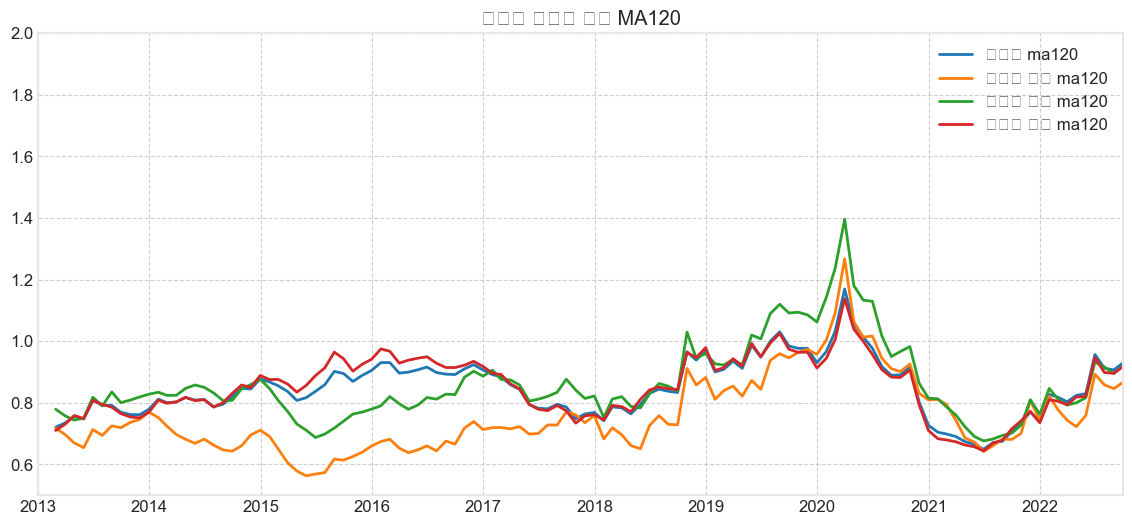

In [22]:
# MA_sep 사용했기 때문에 1 값에서 진동함

fig = plt.figure(figsize=(14, 6))
ax = fig.add_subplot(1, 1, 1)

ax.plot(df_scale_month_kospi["MA120_sep"], label='코스피 ma120')
ax.plot(df_scale_month_small["MA120_sep"], label='코스피 소형 ma120')
ax.plot(df_scale_month_medium["MA120_sep"], label='코스피 중형 ma120')
ax.plot(df_scale_month_large["MA120_sep"], label='코스피 대형 ma120')



ax.legend(loc='best')
plt.title('코스피 시총별 월별 MA120')
my_date_start = date(2013, 1, 1)
my_date_end = date(2022, 9, 30)
plt.xlim([my_date_start, my_date_end])
plt.ylim(0.5, 2)
plt.show()